# Import all the libraries here

In [1]:
# basic
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# ml preprocessing
from sklearn.model_selection import train_test_split

# ml models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# ml metrics
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error

# additional settings
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

## Load data

In [2]:
data = pd.read_csv("../data/financial_data_ml.csv", index_col=0)
df = data.copy()

In [3]:
df.head(4)

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,mortgage_rate,vix,wti,volume,month,year,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,inflation_category,interest_rate_category,crisis_period,sp_close_pct_change,sp_close
0,2000-04-01,170.9,3.8,10247.72,6.02,6.03,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.11,26.86,1.227400e+09,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Low,Hawkish,Stable,0.000000,1498.579956
1,2000-04-03,170.9,3.8,10247.72,6.02,6.00,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.03,26.28,1.021700e+09,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,-2.159345,Low,Hawkish,Stable,0.493134,1505.969971
2,2000-04-04,170.9,3.8,10247.72,6.02,5.90,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,27.12,25.46,1.515460e+09,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,-3.120244,Low,Hawkish,Stable,-0.746362,1494.729980
3,2000-04-05,170.9,3.8,10247.72,6.02,5.90,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,28.41,25.76,1.110300e+09,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.178319,Low,Hawkish,Stable,-0.492396,1487.369995


**Some comments**
- Here I am not trying to forecast S&P 500. Just trying to predict S&P 500 for a certain time period.
- So I can drop `date`, `month`, `year`, `sp_close_pct_change`.
- My target is then `sp_close`.

In [4]:
## drop the above columns then
df = df.drop(columns=["date", "month", "year", "sp_close_pct_change"])

In [5]:
df.head(2)

,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,mortgage_rate,vix,wti,volume,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,inflation_category,interest_rate_category,crisis_period,sp_close
0,170.9,3.8,10247.72,6.02,6.03,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.11,26.86,1.227400e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Low,Hawkish,Stable,1498.579956
1,170.9,3.8,10247.72,6.02,6.00,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.03,26.28,1.021700e+09,0.0,0.0,0.0,0.0,0.0,0.0,-2.159345,Low,Hawkish,Stable,1505.969971


## One hot encoding

Before applying any baseline models, we have to transform the 
categorical columns to numerical ones.

In [6]:
df = pd.get_dummies(df, drop_first=True)

In [7]:
df = df * 1

In [8]:
df

,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,mortgage_rate,vix,wti,volume,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,sp_close,inflation_category_Low,inflation_category_Moderate,interest_rate_category_Hawkish,interest_rate_category_Neutral,crisis_period_Financial Crisis,crisis_period_Russia-Ukraine crisis,crisis_period_Stable
0,170.900,3.8,10247.720,6.02,6.03,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,24.11,26.86,1.227400e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1498.579956,1,0,1,0,0,0,1
1,170.900,3.8,10247.720,6.02,6.00,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,24.03,26.28,1.021700e+09,0.0,0.0,0.0,0.0,0.0,0.0,-2.159345,1505.969971,1,0,1,0,0,0,1
2,170.900,3.8,10247.720,6.02,5.90,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,27.12,25.46,1.515460e+09,0.0,0.0,0.0,0.0,0.0,0.0,-3.120244,1494.729980,1,0,1,0,0,0,1
3,170.900,3.8,10247.720,6.02,5.90,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,28.41,25.76,1.110300e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.178319,1487.369995,1,0,1,0,0,0,1
4,170.900,3.8,10247.720,6.02,5.93,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,27.15,25.51,1.008000e+09,0.0,0.0,0.0,0.0,0.0,0.0,-0.970497,1501.339966,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,319.775,4.1,29719.647,4.33,4.25,21561.4,71.7,104.2062,3218.60,4149.659,1501.0,6.65,19.90,67.84,4.660090e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5675.290039,1,0,1,0,0,0,1
6599,319.775,4.1,29719.647,4.33,4.24,21561.4,71.7,104.2062,3218.60,4149.659,1501.0,6.67,19.80,67.84,4.678420e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5662.890137,1,0,1,0,0,0,1
6600,319.775,4.1,29719.647,4.33,4.25,21561.4,71.7,104.2062,3218.60,4149.659,1501.0,6.67,19.28,67.84,9.367460e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5667.560059,1,0,1,0,0,0,1
6601,319.775,4.1,29719.647,4.33,4.25,21561.4,71.7,104.2062,3218.60,4149.659,1501.0,6.67,17.48,67.84,4.517990e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5767.569824,1,0,1,0,0,0,1


In [9]:
# move target to the end
target = df.pop("sp_close")
df["sp_close"] = target

# Functions

In [10]:
def train_linear_models(data, model_list):
    # independent and dependant variables
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    # train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f'100% of our data: {len(df)}.')
    print(f'70% for training data: {len(X_train)}.')
    print(f'30% for test data: {len(X_test)}.')

    # metric dataframe
    metric_dict = {
        "R2" : [],
        "RMSE" : [],
        "MSE" : [],
        "MAE" : []
    }

    # Train the model
    for key, value in model_list.items():
        model = value
        model.fit(X_train,y_train)

        # Make predictions on the test dataset
        predictions = model.predict(X_test)

        # calculating metrics
        r2 = r2_score(y_test, predictions)
        RMSE = np.sqrt(mean_squared_error(y_test, predictions))
        MSE = mean_squared_error(y_test, predictions)
        MAE = mean_absolute_error(y_test, predictions)

        # append to the metric dictionary
        metric_dict["R2"].append(r2)
        metric_dict["RMSE"].append(RMSE)
        metric_dict["MSE"].append(MSE)
        metric_dict["MAE"].append(MAE)

    # metric_dict to dataframe
    df_metric = pd.DataFrame(data=metric_dict, index=model_list.keys())
    
    return df_metric

## Baseline model

### X-y 

In [11]:
X = df.drop(columns=["sp_close"])
y = df["sp_close"]

### Train test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Simple Linear Regression Model

In [13]:
model_lr = LinearRegression()

In [14]:
# train the model
model_lr.fit(X_train, y_train)

LinearRegression()

In [15]:
# prediction with training and testing data
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

In [16]:
# calculate the r2 score
r2_train_lr = r2_score(y_train, y_pred_train)
r2_test_lr = r2_score(y_test, y_pred_test)

# calculate rmse
rmse_train_lr = root_mean_squared_error(y_train, y_pred_train)
rmse_test_lr = root_mean_squared_error(y_test, y_pred_test)

# calculate mae
mae_train_lr = mean_absolute_error(y_train, y_pred_train)
mae_test_lr = mean_absolute_error(y_test, y_pred_test)

In [17]:
# print the results
# r2 score
print(f"The r2 score with training data: {r2_train_lr}")
print(f"The r2 score with test data: {r2_test_lr}")

print()

# rmse
print(f"The rmse with training data: {rmse_train_lr}")
print(f"The rmse with test data: {rmse_test_lr}")

print()

# mae
print(f"The mae with training data: {mae_train_lr}")
print(f"The mae with test data: {mae_test_lr}")

The r2 score with training data: 0.9752675989773731
The r2 score with test data: 0.9721809996026078

The rmse with training data: 204.28677817673622
The rmse with test data: 212.29287397625384

The mae with training data: 146.16436665802385
The mae with test data: 151.835990491987


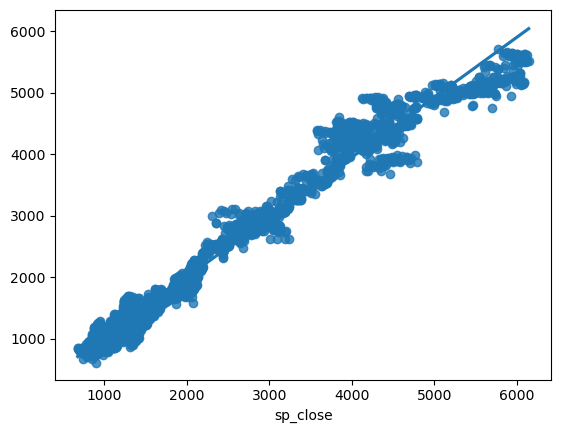

In [18]:
# check with plot
sns.regplot(x=y_train, y=y_pred_train)
plt.show()

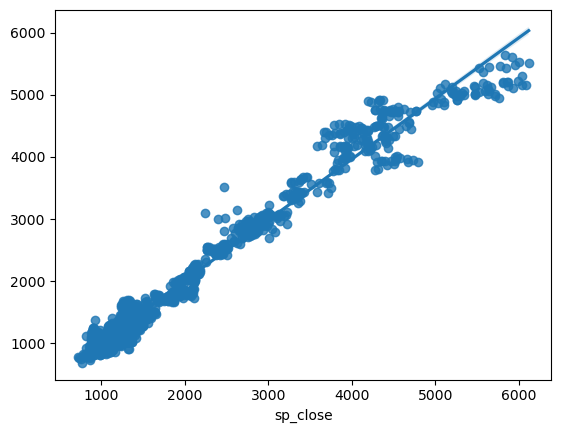

In [19]:
# check with plot
sns.regplot(x=y_test, y=y_pred_test)
plt.show()

**Comments**
- Even if the accuracy is pretty high, the RMSE is also very high.
- I have to fine tune the model or try different models first.
- I should drop multicolinearity as found before.
- Let's try other models also before doing fine tuning.

## Other baseline models

In [20]:
# list of ml models
model_list = {"LR" : LinearRegression(), 
              "Lasso" : Lasso(), 
              "Ridge" : Ridge(), 
              "Decision Tree" : DecisionTreeRegressor(), 
              "KNR" : KNeighborsRegressor(), 
              "Random Forest" : RandomForestRegressor(),
              "XGBR" : xgb.XGBRegressor()
             }

# dataframe metric
df_metric_baseline = train_linear_models(df, model_list)

100% of our data: 6603.
70% for training data: 5282.
30% for test data: 1321.


In [21]:
list(model_list.keys())

['LR', 'Lasso', 'Ridge', 'Decision Tree', 'KNR', 'Random Forest', 'XGBR']

In [22]:
model_list.values()

dict_values([LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), KNeighborsRegressor(), RandomForestRegressor(), XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)])

In [23]:
df_metric_baseline

,R2,RMSE,MSE,MAE
LR,0.972181,212.292874,4.506826e+04,151.835990
Lasso,0.972406,211.433576,4.470416e+04,154.115309
Ridge,0.972230,212.106082,4.498899e+04,151.896100
Decision Tree,0.999290,33.917694,1.150410e+03,19.018518
KNR,0.121639,1192.892472,1.422992e+06,844.050355
Random Forest,0.999668,23.178527,5.372441e+02,13.664171
XGBR,0.999554,26.893260,7.232475e+02,16.349955


In [24]:
df_metric_baseline["R2"].values

array([0.972181  , 0.97240575, 0.97222993, 0.99928989, 0.12163852,
       0.99966838, 0.99955357])

**Comments**
- KNR works the worst for this problem.
- LR, Lasso and Ridge work well with almost 97% accuracy, but the RMSE is quite high.
- Decision Tree and Random Forest work the best with the lowest RMSE with Decision Tree.
- May be Decision Tree and Random Forest are over fitting?

## Remove multicolinearity

There are multiple columns which are colinear. We should first remove them to improve the models.

**Multicolinearity**
- The columns which have more than 0.90 correlation will be removed before training ML models. 
- XGBoost Regressor will help removing columns based on importance.
- Correlated columns:
    - `gdp` & `inflation`
    - `m2_money_supp` & `inflation`
    - `m2_money_supp` & `gdp`
    - `exports` & `inflation`
    - `exports` & `gdp`
    - `exports` & `m2_money_supp`
    - `imports` & `gdp`
    - `imports` & `m2_money_supp`
    - `imports` & `inflation`
    - `imports` & `exports`
    - `mortgage_rate` & `ten_year_yield`
    - `imports_pct_change` & `exports_pct_change`

#### Using XGB Regression to find the feature importance

In [25]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [26]:
sort_idx = xgbr.feature_importances_.argsort()

In [27]:
sort_idx

array([15, 27, 22, 23, 20, 19, 18, 16, 24, 17, 14, 21, 11, 13,  4, 26, 28,
        6, 12, 25,  3, 10,  1,  7,  8,  2,  9,  5,  0])

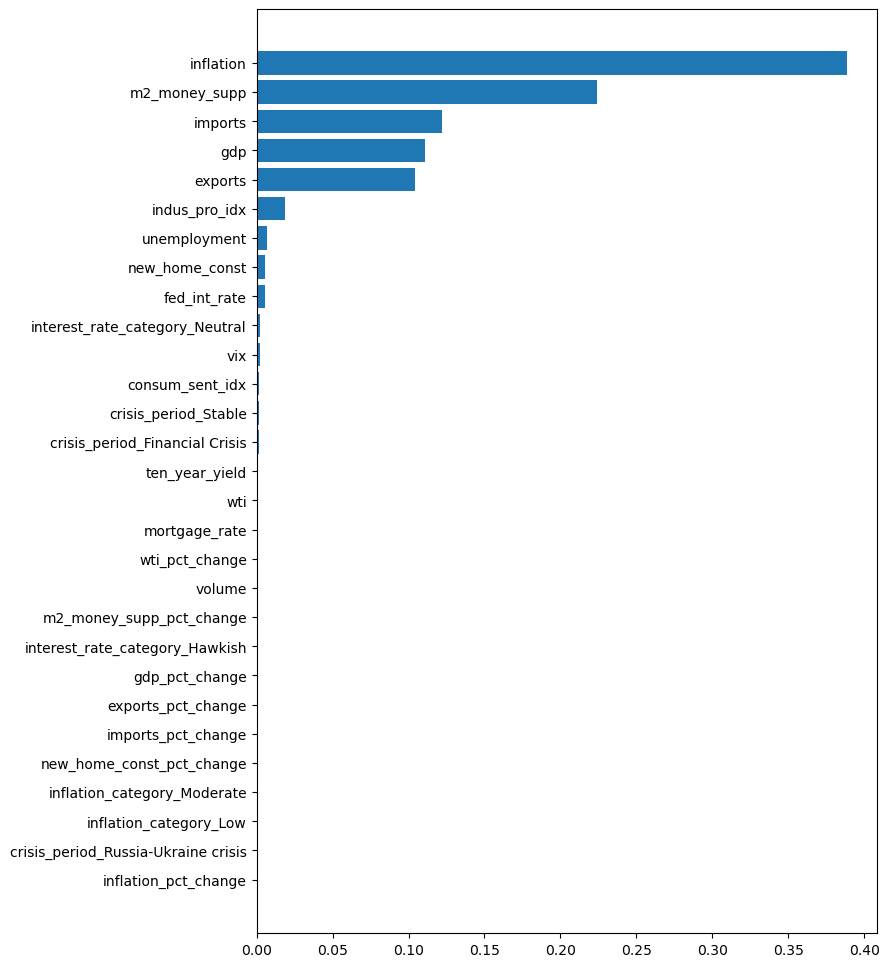

In [28]:
plt.figure(figsize=(8, 12))
plt.barh(X.columns[sort_idx],xgbr.feature_importances_[sort_idx])
plt.show()

**Remove these columns**
- `inflation`
- `gdp`
- `exports`

In [29]:
df = df.drop(columns=["inflation", "gdp", "exports"])
df

,unemployment,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,imports,new_home_const,mortgage_rate,vix,wti,volume,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,inflation_category_Low,inflation_category_Moderate,interest_rate_category_Hawkish,interest_rate_category_Neutral,crisis_period_Financial Crisis,crisis_period_Russia-Ukraine crisis,crisis_period_Stable,sp_close
0,3.8,6.02,6.03,4767.8,109.2,92.6659,1455.860,1626.0,8.23,24.11,26.86,1.227400e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,1,0,0,0,1,1498.579956
1,3.8,6.02,6.00,4767.8,109.2,92.6659,1455.860,1626.0,8.23,24.03,26.28,1.021700e+09,0.0,0.0,0.0,0.0,0.0,0.0,-2.159345,1,0,1,0,0,0,1,1505.969971
2,3.8,6.02,5.90,4767.8,109.2,92.6659,1455.860,1626.0,8.23,27.12,25.46,1.515460e+09,0.0,0.0,0.0,0.0,0.0,0.0,-3.120244,1,0,1,0,0,0,1,1494.729980
3,3.8,6.02,5.90,4767.8,109.2,92.6659,1455.860,1626.0,8.23,28.41,25.76,1.110300e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.178319,1,0,1,0,0,0,1,1487.369995
4,3.8,6.02,5.93,4767.8,109.2,92.6659,1455.860,1626.0,8.23,27.15,25.51,1.008000e+09,0.0,0.0,0.0,0.0,0.0,0.0,-0.970497,1,0,1,0,0,0,1,1501.339966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,4.1,4.33,4.25,21561.4,71.7,104.2062,4149.659,1501.0,6.65,19.90,67.84,4.660090e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,1,0,0,0,1,5675.290039
6599,4.1,4.33,4.24,21561.4,71.7,104.2062,4149.659,1501.0,6.67,19.80,67.84,4.678420e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,1,0,0,0,1,5662.890137
6600,4.1,4.33,4.25,21561.4,71.7,104.2062,4149.659,1501.0,6.67,19.28,67.84,9.367460e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,1,0,0,0,1,5667.560059
6601,4.1,4.33,4.25,21561.4,71.7,104.2062,4149.659,1501.0,6.67,17.48,67.84,4.517990e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,1,0,0,0,1,5767.569824


In [30]:
# calculate and plot the correlation matrix again
cor_mat = df.corr(method='pearson').round(2)

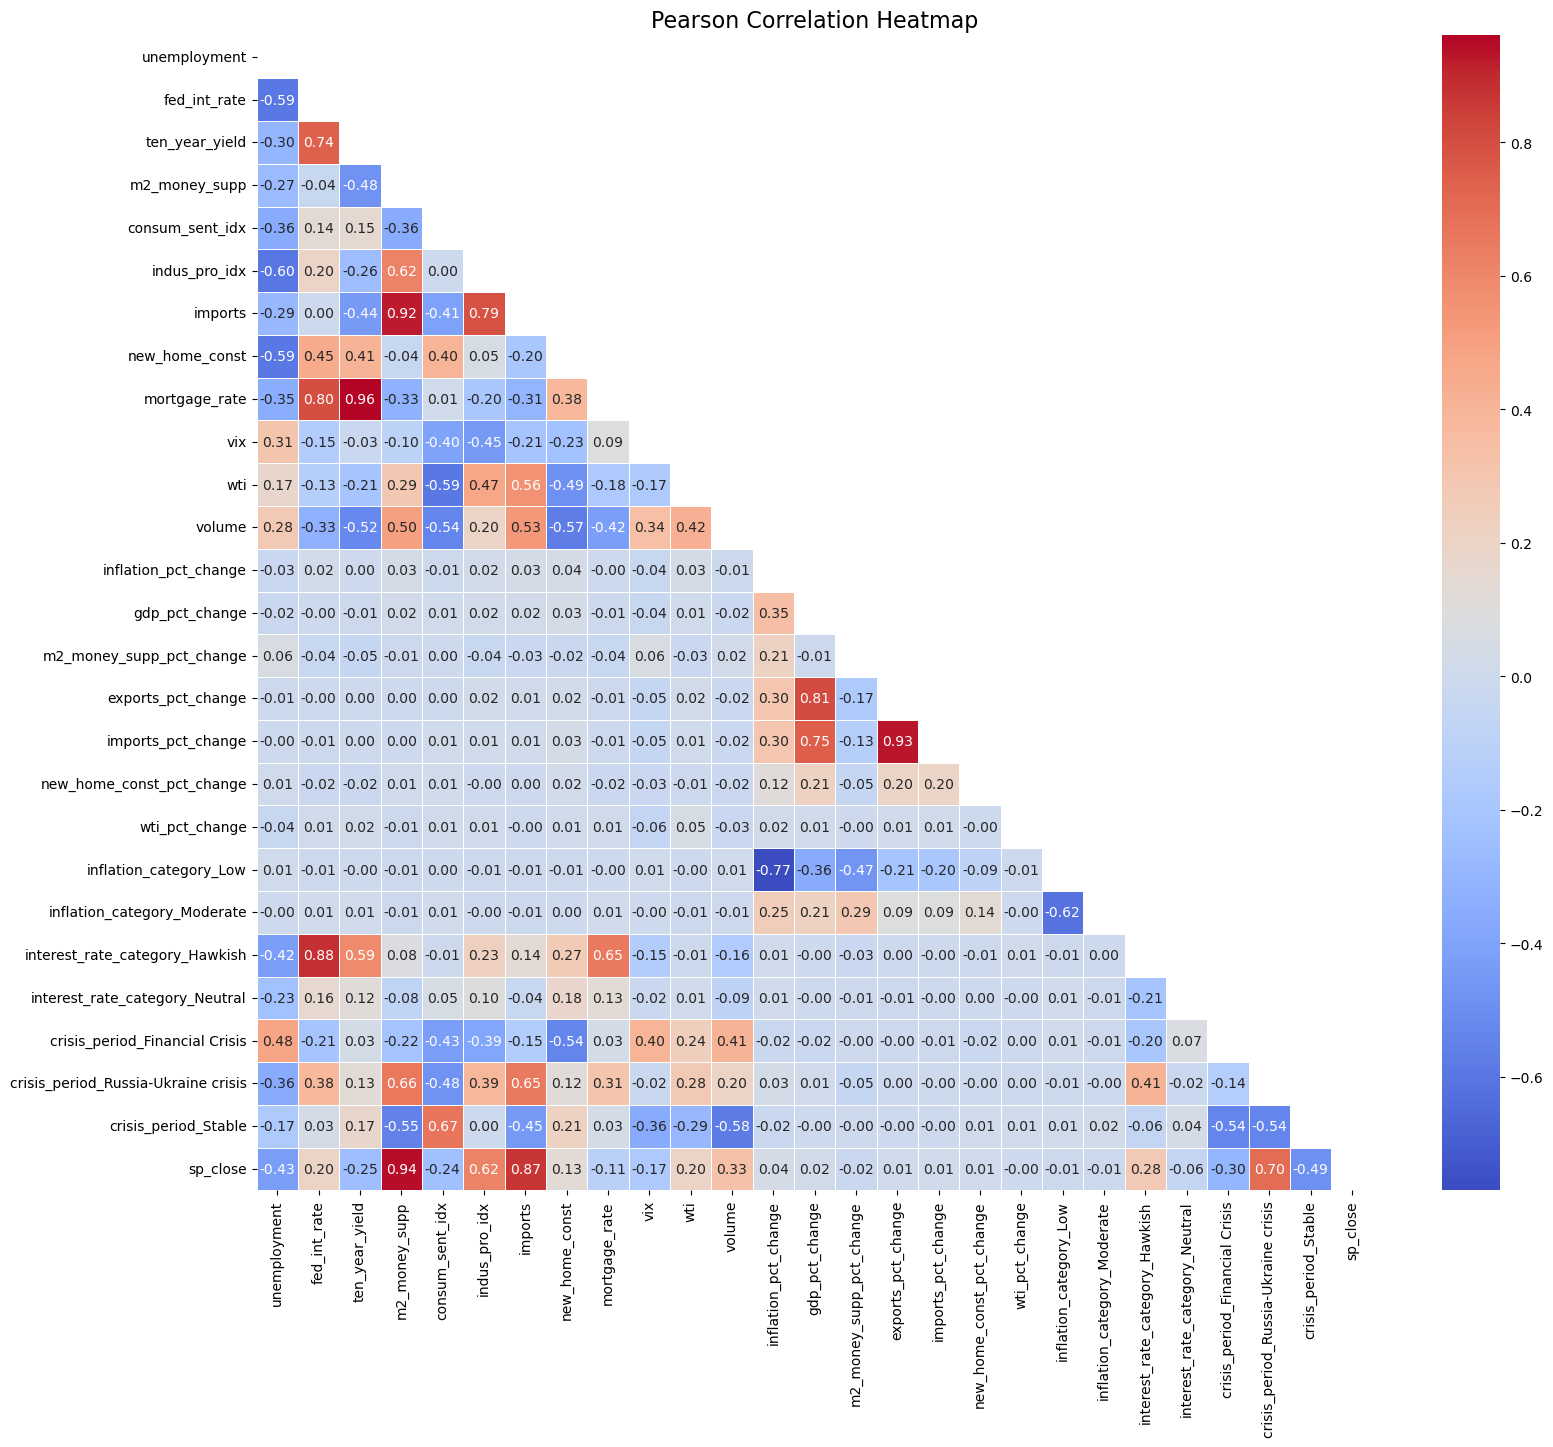

In [31]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(cor_mat, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(18, 15))

# Draw the heatmap with the mask
sns.heatmap(cor_mat, mask=mask, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

plt.title("Pearson Correlation Heatmap", fontsize=16)
plt.show()

In [32]:
# drop imports and mortgage_rate, imports_pct_change
df = df.drop(columns=["imports", "mortgage_rate", "imports_pct_change"])
df

,unemployment,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,new_home_const,vix,wti,volume,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,new_home_const_pct_change,wti_pct_change,inflation_category_Low,inflation_category_Moderate,interest_rate_category_Hawkish,interest_rate_category_Neutral,crisis_period_Financial Crisis,crisis_period_Russia-Ukraine crisis,crisis_period_Stable,sp_close
0,3.8,6.02,6.03,4767.8,109.2,92.6659,1626.0,24.11,26.86,1.227400e+09,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,1,0,0,0,1,1498.579956
1,3.8,6.02,6.00,4767.8,109.2,92.6659,1626.0,24.03,26.28,1.021700e+09,0.0,0.0,0.0,0.0,0.0,-2.159345,1,0,1,0,0,0,1,1505.969971
2,3.8,6.02,5.90,4767.8,109.2,92.6659,1626.0,27.12,25.46,1.515460e+09,0.0,0.0,0.0,0.0,0.0,-3.120244,1,0,1,0,0,0,1,1494.729980
3,3.8,6.02,5.90,4767.8,109.2,92.6659,1626.0,28.41,25.76,1.110300e+09,0.0,0.0,0.0,0.0,0.0,1.178319,1,0,1,0,0,0,1,1487.369995
4,3.8,6.02,5.93,4767.8,109.2,92.6659,1626.0,27.15,25.51,1.008000e+09,0.0,0.0,0.0,0.0,0.0,-0.970497,1,0,1,0,0,0,1,1501.339966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,4.1,4.33,4.25,21561.4,71.7,104.2062,1501.0,19.90,67.84,4.660090e+09,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,1,0,0,0,1,5675.290039
6599,4.1,4.33,4.24,21561.4,71.7,104.2062,1501.0,19.80,67.84,4.678420e+09,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,1,0,0,0,1,5662.890137
6600,4.1,4.33,4.25,21561.4,71.7,104.2062,1501.0,19.28,67.84,9.367460e+09,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,1,0,0,0,1,5667.560059
6601,4.1,4.33,4.25,21561.4,71.7,104.2062,1501.0,17.48,67.84,4.517990e+09,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,1,0,0,0,1,5767.569824


In [33]:
# calculate and plot the correlation matrix again
cor_mat_2 = df.corr(method='pearson').round(2)

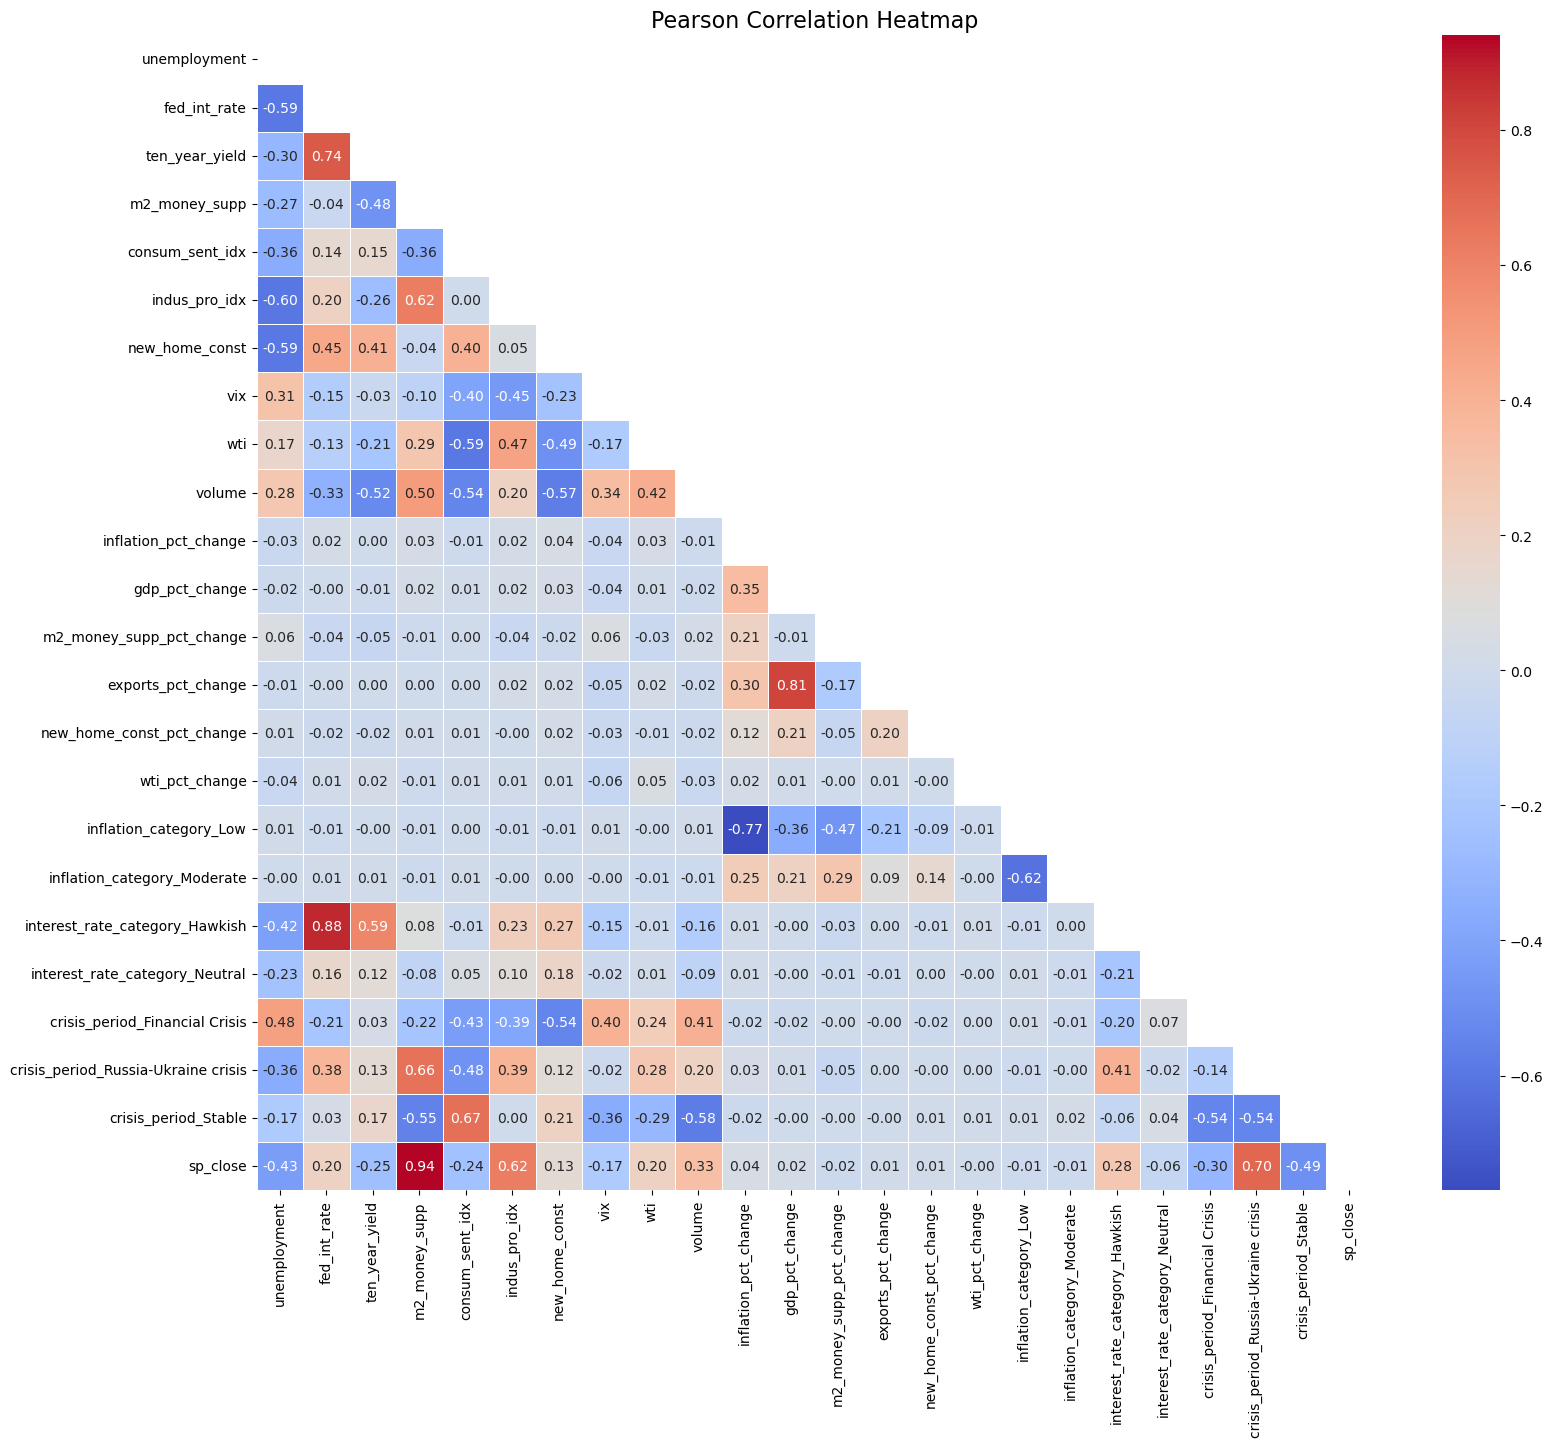

In [34]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(cor_mat_2, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(18, 15))

# Draw the heatmap with the mask
sns.heatmap(cor_mat_2, mask=mask, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

plt.title("Pearson Correlation Heatmap", fontsize=16)
plt.show()

In [35]:
df.shape

(6603, 24)

### Train the models with these dataframe now and calculate the accuracy matrix

In [36]:
df_metric_multi_col = train_linear_models(df, model_list)
df_metric_multi_col

100% of our data: 6603.
70% for training data: 5282.
30% for test data: 1321.


,R2,RMSE,MSE,MAE
LR,0.966031,234.587974,5.503152e+04,155.530599
Lasso,0.966315,233.606658,5.457207e+04,153.238525
Ridge,0.966048,234.529647,5.500416e+04,155.434155
Decision Tree,0.999167,36.729737,1.349074e+03,20.164637
KNR,0.121638,1192.893051,1.422994e+06,844.080549
Random Forest,0.999600,25.469525,6.486967e+02,15.026960
XGBR,0.999499,28.495112,8.119714e+02,17.447973


In [38]:
print(df_metric_baseline)

                     R2         RMSE           MSE         MAE
LR             0.972181   212.292874  4.506826e+04  151.835990
Lasso          0.972406   211.433576  4.470416e+04  154.115309
Ridge          0.972230   212.106082  4.498899e+04  151.896100
Decision Tree  0.999290    33.917694  1.150410e+03   19.018518
KNR            0.121639  1192.892472  1.422992e+06  844.050355
Random Forest  0.999668    23.178527  5.372441e+02   13.664171
XGBR           0.999554    26.893260  7.232475e+02   16.349955


**Comments**
- After removing the multicolinearity
    - the accuracies of LR, Lasso and Ridge dropeed by 1%.
    - the accuracies of Decision Tree and Random Forest remain the same, 
    but the RMSE slightly increased.

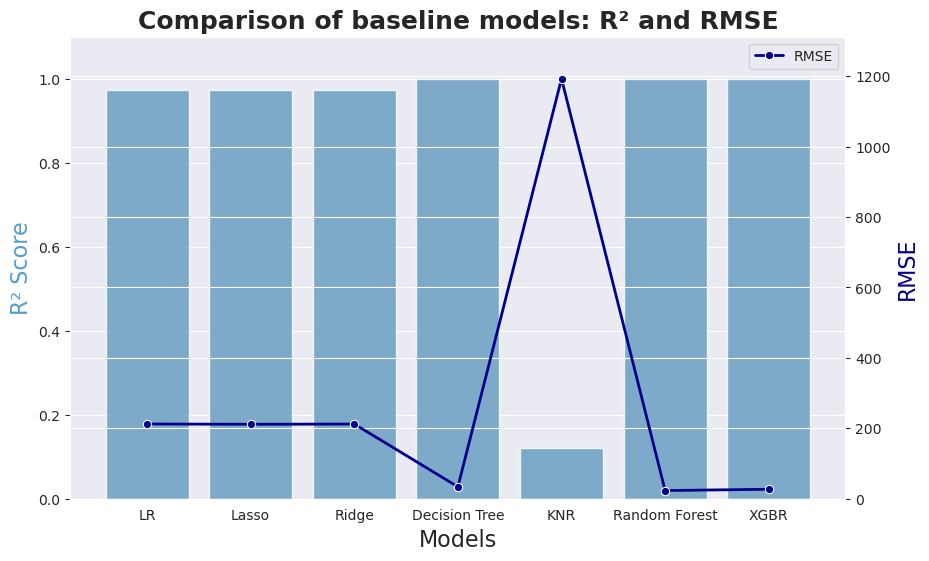

In [56]:
# Set style
sns.set_style("darkgrid")
sns.set_palette("Blues")

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot R² as bar chart
sns.barplot(x=df_metric_baseline.index, y=df_metric_baseline["R2"], 
data=df_metric_baseline, ax=ax1, color=sns.color_palette("Blues_r")[2], alpha=0.8)

# Create secondary y-axis for RMSE
ax2 = ax1.twinx()
sns.lineplot(x=df_metric_baseline.index, y=df_metric_baseline["RMSE"], data=df_metric_baseline, 
ax=ax2, color="darkblue", marker="o", linewidth=2, label="RMSE")

# Labels
ax1.set_xlabel("Models", fontsize=16)
ax1.set_ylabel("R² Score", fontsize=16, color=sns.color_palette("Blues_r")[2])
ax2.set_ylabel("RMSE", fontsize=16, color="darkblue")

# Adjust y-axis limits
ax1.set_ylim(0, 1.1)
ax2.set_ylim(0, max(df_metric_baseline["RMSE"]) * 1.1)

# Title
plt.title("Comparison of baseline models: R² and RMSE", fontsize=18, fontweight="bold")

# Show plot
plt.legend(loc="upper right")
plt.savefig("../plot/baseline_models.png", bbox_inches="tight", dpi=600)
plt.show()

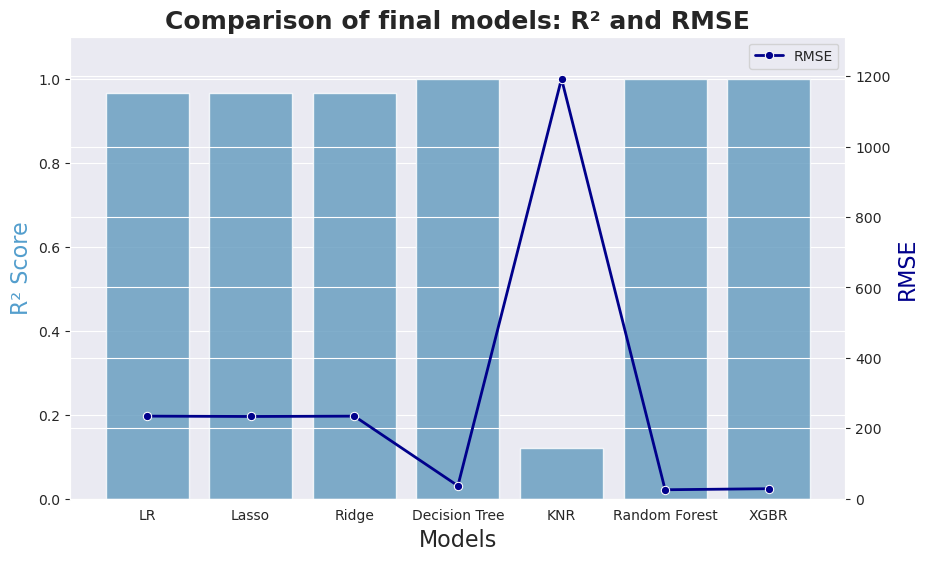

In [55]:
# Set style
sns.set_style("darkgrid")
sns.set_palette("Blues")

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot R² as bar chart
sns.barplot(x=df_metric_multi_col.index, y=df_metric_multi_col["R2"], 
data=df_metric_multi_col, ax=ax1, color=sns.color_palette("Blues_r")[2], alpha=0.8)

# Create secondary y-axis for RMSE
ax2 = ax1.twinx()
sns.lineplot(x=df_metric_multi_col.index, y=df_metric_multi_col["RMSE"], 
data=df_metric_multi_col, ax=ax2, color="darkblue", marker="o", linewidth=2, label="RMSE")

# Labels
ax1.set_xlabel("Models", fontsize=16)
ax1.set_ylabel("R² Score", fontsize=16, color=sns.color_palette("Blues_r")[2])
ax2.set_ylabel("RMSE", fontsize=16, color="darkblue")

# Adjust y-axis limits
ax1.set_ylim(0, 1.1)
ax2.set_ylim(0, max(df_metric_multi_col["RMSE"]) * 1.1)

# Title
plt.title("Comparison of final models: R² and RMSE", fontsize=18, fontweight="bold")

# Show plot
plt.legend(loc="upper right")
plt.savefig("../plot/final_models.png", bbox_inches="tight", dpi=600)
plt.show()